In [1]:
import pandas as pd
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm
sns.set(style="white")

## Top Amenities on AirBnB listings
#### Goals for this step

- Find out which are the most common amenities for the higher review scores
- Find out the average scores AirBnB who do not have 50% of the basic amenities


In [2]:
df = pd.read_pickle("C:/Users/Admin/Documents/ironhack/AirBnB_data/airbnb_amenities.pkl")

In [3]:
df.head()

amenity,wireless internet,kitchen,heating,essentials,washer,tv,smoke detector,internet,hangers,shampoo,...,cleaning before checkout,accessible-height toilet,handheld shower head,fireplace guards,baby monitor,hot water kettle,wide clearance to shower & toilet,firm mattress,review_score,price
0,1,0,1,1,0,1,0,1,0,1,...,0,0,0,0,0,0,0,0,90.0,74.0
1,1,1,1,1,0,0,0,1,1,0,...,0,0,0,0,0,0,0,0,87.0,55.0
2,1,1,1,1,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,100.0,993.0
3,1,1,1,1,1,1,1,1,1,1,...,0,0,0,0,0,0,0,0,100.0,697.0
4,1,1,1,1,0,0,1,1,0,1,...,0,0,0,0,0,0,0,0,94.0,424.0


## Find out top amenities

In [4]:
df["review_score"].describe()

count    380224.000000
mean         93.088024
std           8.373247
min          20.000000
25%          90.000000
50%          95.000000
75%         100.000000
max         100.000000
Name: review_score, dtype: float64

We will focus on review scores greater than or equal to 95, those will be our top reviews

In [5]:
top_reviews = df.loc[df["review_score"] >= 95]

In [6]:
top_reviews.sum().sort_values(ascending=False)

amenity
price                                29902525.0
review_score                         20474275.0
wireless internet                      201791.0
heating                                193414.0
kitchen                                193398.0
                                        ...    
fireplace guards                          475.0
baby monitor                              471.0
hot water kettle                          370.0
wide clearance to shower & toilet         321.0
firm mattress                             281.0
Length: 102, dtype: float64

When entering a new listing on AirBnB, it gives you a checklist of amenities that guests usually expect. We will create a list of basic amenities and remove them from the analysis to see what are the extra amenities that get higher review scores.

In [7]:
amenities_top = list(top_reviews.columns)

In [8]:
amenities_top.sort()

In [9]:
top_10 = (top_reviews.drop(columns=["price", "review_score"]).sum().sort_values(ascending=False).head(10)
          .reset_index().rename(columns={0:"count"}))

In [10]:
top_10

,amenity,count
0,wireless internet,201791
1,heating,193414
2,kitchen,193398
3,essentials,188274
4,washer,158407
5,tv,154117
6,smoke detector,147271
7,hangers,141090
8,shampoo,139782
9,hair dryer,132815


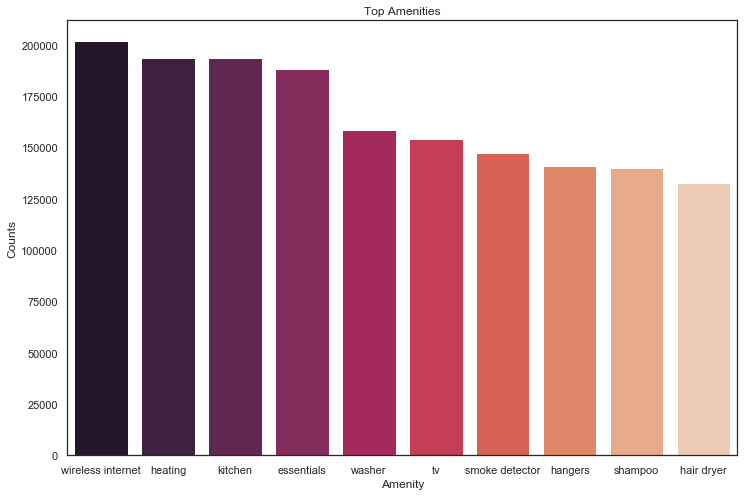

In [11]:
fig, ax = plt.subplots(figsize=(12,8))

sns.barplot(data=top_10,
           x="amenity",
           y="count",
           palette="rocket")

ax.set_title("Top Amenities")
ax.set_xlabel("Amenity")
ax.set_ylabel("Counts");

We will create the list of basic amenities based on the airbnb "basic" amenities checklist.
Wifi was defined as "wireless internet", desk/workspace as "laptop friendly workspace" and closet/drawers to "hangers" based on the list of amenities in our data set.

In [12]:
basic_amenities = ["essentials", "wireless internet", "internet", "tv", "heating", "air conditioning", "iron", "shampoo"
                   , "hair dryer", "breakfast", "laptop friendly workspace", "indoor fireplace", "hangers", "private entrance"
                  , "smoke detector", "carbon monoxide detector", "fire extinguisher", "first aid kit"
                   , "lock on bedroom door"]


In [13]:
new_columns = []

for i in df.columns:
    if i not in basic_amenities:
        new_columns.append(i)


In [14]:
top_amenities_new = top_reviews[new_columns].reset_index(drop=True).copy()

top_amenities_new.head()

amenity,kitchen,washer,family/kid friendly,dryer,buzzer/wireless intercom,cable tv,free parking on premises,24-hour check-in,elevator in building,safety card,...,cleaning before checkout,accessible-height toilet,handheld shower head,fireplace guards,baby monitor,hot water kettle,wide clearance to shower & toilet,firm mattress,review_score,price
0,1,0,1,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,100.0,993.0
1,1,1,0,1,1,1,0,1,1,0,...,0,0,0,0,0,0,0,0,100.0,697.0
2,1,1,1,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,100.0,503.0
3,1,0,1,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,97.0,450.0
4,1,1,0,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,100.0,95.0


In [15]:
# top_amenities_new.to_pickle("C:/Users/Admin/Documents/ironhack/AirBnB_data/airbnb_amenities_extra.pkl")

In [16]:
top_amenities_new_count = top_amenities_new.drop(columns=["price", "review_score"]).sum().sort_values(ascending=False).head(10)

In [17]:
top_amenities_new_count = (top_amenities_new_count.reset_index().rename(columns={0:"count"}))

In [18]:
top_amenities_new_count

,amenity,count
0,kitchen,193398
1,washer,158407
2,family/kid friendly,119404
3,dryer,101195
4,free parking on premises,68131
5,cable tv,64623
6,buzzer/wireless intercom,59725
7,24-hour check-in,56286
8,elevator in building,46973
9,safety card,34429


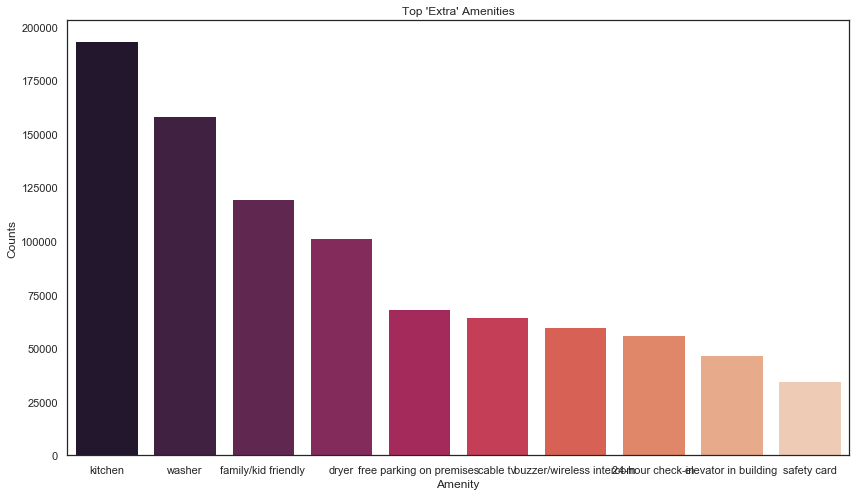

In [19]:
fig, ax = plt.subplots(figsize=(14,8))

sns.barplot(data=top_amenities_new_count,
           x="amenity",
           y="count",
           palette="rocket")

ax.set_title("Top 'Extra' Amenities")
ax.set_xlabel("Amenity")
ax.set_ylabel("Counts");

From the graph on top we can see the most common amenities on AirBnBs that got the higher review scores, kitchen and washer are both in the top amenities considering the basic ones.

## Find out average review scores for listings with 50% of the required amenities

First, we will create a data frame with the basic amenities as columns

In [21]:
df_basic_amenities = df[basic_amenities].copy()

We will add the total number of basic amenities they have, with this we can say that if they have more than 8 basic amenities, they comply with at least 50% of basic amenities. For this we will create another column "has_basic" with a 1 indicating it complies and a 0 for not complying.

In [22]:
df_basic_amenities["amenities_sum"] = df_basic_amenities.sum(axis=1)

In [23]:
df_basic_amenities["has_basic"] = np.where(df_basic_amenities["amenities_sum"] > 8, 1, 0)

In [24]:
df_basic_amenities

amenity,essentials,wireless internet,internet,tv,heating,air conditioning,iron,shampoo,hair dryer,breakfast,...,indoor fireplace,hangers,private entrance,smoke detector,carbon monoxide detector,fire extinguisher,first aid kit,lock on bedroom door,amenities_sum,has_basic
0,1,1,1,1,1,1,0,1,0,0,...,0,0,0,0,0,1,1,0,9,1
1,1,1,1,0,1,0,1,0,1,0,...,0,1,1,0,0,0,0,0,8,0
2,1,1,0,1,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,4,0
3,1,1,1,1,1,0,1,1,1,0,...,0,1,0,1,1,0,0,0,12,1
4,1,1,1,0,1,0,0,1,1,0,...,0,0,0,1,0,0,0,0,8,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
380219,1,1,0,1,1,1,0,1,1,0,...,0,1,0,1,1,1,1,1,13,1
380220,1,1,1,1,1,0,1,0,1,0,...,0,0,0,0,0,0,0,0,7,0
380221,1,1,1,0,1,0,1,1,0,0,...,1,1,0,1,1,1,0,0,11,1
380222,1,1,0,1,1,1,0,0,0,1,...,1,1,0,1,0,0,0,0,9,1


We will later add both new columns to the original data frame in order to analyze the review scores.

In [25]:
df["has_basic"] = df_basic_amenities["has_basic"]
df["amenities_sum"] = df_basic_amenities["amenities_sum"]


In [26]:
df[df["has_basic"] == 0]["review_score"].describe()

count    145212.000000
mean         91.506955
std           9.558707
min          20.000000
25%          88.000000
50%          93.000000
75%         100.000000
max         100.000000
Name: review_score, dtype: float64

The average score for AirBnB listings that do not comply with 50% of the basic amenities is 91.5.
This could mean that they may not necessarily publish the amenities, but the customers still have a pleasant stay.

Another interesting point to look out is to look at the review scores for listings that have 0 amenities and look at listings with a review score of 20, which is the minimum, and see what amenities do they have.

In [27]:
df_basic_amenities["amenities_sum"].value_counts().sort_index()

0      1176
1       792
2      2929
3      7690
4     15409
5     22453
6     27671
7     31883
8     35209
9     38138
10    38512
11    36941
12    34281
13    31694
14    24786
15    17719
16     9196
17     3027
18      653
19       65
Name: amenities_sum, dtype: int64

In [28]:
df[df["amenities_sum"] == 0]["review_score"].describe()

count    1176.000000
mean       90.991497
std        12.365495
min        20.000000
25%        86.000000
50%        95.000000
75%       100.000000
max       100.000000
Name: review_score, dtype: float64

Where we have 0 amenities, 75% of the review scores tend to be from 86-100.

This may suggest that the amenities may not be listed but the users still have pleasant stays.

In [29]:
df_rs20 = df[df["review_score"] == 20].reset_index(drop=True).copy().drop(columns=["price", "amenities_sum","has_basic"])

In [30]:
df_rs20.shape

(574, 101)

In [32]:
df_rs20.sum().sort_values(ascending=False).head(30)

amenity
review_score                 11480.0
kitchen                        517.0
wireless internet              510.0
essentials                     452.0
heating                        450.0
washer                         399.0
tv                             349.0
smoke detector                 317.0
family/kid friendly            311.0
shampoo                        298.0
hangers                        297.0
internet                       252.0
hair dryer                     245.0
laptop friendly workspace      238.0
iron                           238.0
air conditioning               231.0
dryer                          213.0
carbon monoxide detector       168.0
fire extinguisher              161.0
elevator in building           159.0
first aid kit                  151.0
free parking on premises       142.0
buzzer/wireless intercom       112.0
lock on bedroom door           109.0
smoking allowed                106.0
cable tv                        99.0
24-hour check-in              

There are 574 listings with 20 as a review score, but as the previous list demonstrates, most of them have the basic amenities.
The review score has more factors involved, meaning that an unpleasant stay regarding the host or the visit in general, could affect the review scores for the listing.